In [1]:
%%latex
\begin{equation}
\begin{aligned}
\text{1. For the dot product }x^Ty \text{ of two vectors x, y ∈ } R^n \text{, there is no operation for the transpose.}\\
\text{A dot of two vectores requires n multiplications and (n-1) additions, thus the exact number of operation is n+n-1 = 2n-1 }\\
\text{For asymptotic cost, it is 2n-1 = O(n)}\\
\text{For the matrix vector product Ax for A ∈} R^{nxn}\text{and } x ∈ R^n \text{, consider for each row in A, it needs to do a dot product with x}\\
\text{There are n rows in A, so the exact number of operation is n(2n-1)} = 2n^2 - n = O(n^2) \\
\text{For the matrix matrix product AB for A, B ∈ } R^{nxn}\text{, consider an element in AB, it is a result of dot product for rows in A and columns in B. }\\
\text{In total, we have } n^2 \text{elements.Thus the exact number of operation is } n^2 \text{(2n-1) = } 2n^3-n^2 = O(n^3)
\end{aligned}
\end{equation}

<IPython.core.display.Latex object>

In [2]:
%%latex
\begin{equation}
\begin{aligned}
\text{2. }A = \begin{pmatrix}
D & B  \\
C & \hat{A} \\ 
\end{pmatrix}\\
\text{Consider the linear equation} \begin{pmatrix}
D & B  \\
C & \hat{A} \\ 
\end{pmatrix}\begin{pmatrix}
x \\
y \\
\end{pmatrix} = \begin{pmatrix}
b1\\
b2\\
\end{pmatrix}\\
\text{Thus we have ① Dx + By = b1, ② Cx +} \hat{A}y = b2 \\
\text{Need to elimate x, and by reareanging equations, we have x = }D^{-1}(b1- By)\\
\text{By substituing x in ② we have C}D^{-1}(b1-By)+\hat{A}y = b2, \text{ rearrange to get C}D^{-1}b1 + (-CD^{-1}B+\hat{A})y = b2\\
\text{Now we need to compute the LU Decomposition of } -CD^{-1}B+\hat{A} \text{. From the lecture we know the cost is }2/3n^3+O(n^2)\\
\text{Consider for }CD^{-1}B \text{, we need to do n operations to invert D and do }n^2\text{operations to multiply with B}\\
\text{This is because D is diagonal, there is no operations for the 0 elements}\\
\text{From Q1 we have } 2n^3 - n^2 \text{ operations for matrix multiplication with } C \text{ and arbitrary matrix } D^{-1}B\\
\text{Condiser substracting } \hat{A} \text{, it will do }n^2 \text{ additions. In total there will be } 2/3n^3+O(n^2)+n+n^2+2n^3-n^2 + n^2= 8/3n^3 + O(n^2)\\
\text{For LU Decomposition directly from A, use the same formula but substitute with 2n due to the difference in dimension.}\\
\text{So the answer is }16/3n^3 + O(n^2)\\
\text{Then we can conclude the ratio is 1/2}\\
\end{aligned}
\end{equation}

<IPython.core.display.Latex object>

In [21]:
import numpy as np
def condest(A, ntrials=5, eps=1E-15):

    trials = []
    e = np.ones(100)
    b = np.matmul(A,e)
    for trial in range(ntrials):
        A_delta = np.random.normal(0,1,(100,100))
        A_delta = A_delta*(eps/np.linalg.norm(A_delta,np.inf))
        sol = np.linalg.solve(A+A_delta,b)
        e_delta = sol - e
        trials.append(np.linalg.norm(e_delta,np.inf)*np.linalg.norm(A,np.inf)/(np.linalg.norm(A_delta,np.inf)*np.linalg.norm(e,np.inf)))
    return np.amax(trials)

A = np.random.randn(100, 100)
condition_estimate = condest(A)
exact = np.linalg.cond(A, np.inf)

print(f"Estimated condition number: {condition_estimate}")
print(f"Exact condition number: {exact}")

import numpy as np
def condest(A, ntrials=5, eps=1E-16):

    trials = []
    e = np.ones(100)
    b = np.matmul(A,e)
    for trial in range(ntrials):
        A_delta = np.random.normal(0,1,(100,100))
        A_delta = A_delta*(eps/np.linalg.norm(A_delta,np.inf))
        sol = np.linalg.solve(A+A_delta,b)
        e_delta = sol - e
        trials.append(np.linalg.norm(e_delta,np.inf)*np.linalg.norm(A,np.inf)/(np.linalg.norm(A_delta,np.inf)*np.linalg.norm(e,np.inf)))
    return np.amax(trials)

A = np.random.randn(100, 100)
condition_estimate = condest(A)
exact = np.linalg.cond(A, np.inf)

print(f"Estimated condition number: {condition_estimate}")
print(f"Exact condition number: {exact}")

import numpy as np
def condest(A, ntrials=5, eps=1E-14):

    trials = []
    e = np.ones(100)
    b = np.matmul(A,e)
    for trial in range(ntrials):
        A_delta = np.random.normal(0,1,(100,100))
        A_delta = A_delta*(eps/np.linalg.norm(A_delta,np.inf))
        sol = np.linalg.solve(A+A_delta,b)
        e_delta = sol - e
        trials.append(np.linalg.norm(e_delta,np.inf)*np.linalg.norm(A,np.inf)/(np.linalg.norm(A_delta,np.inf)*np.linalg.norm(e,np.inf)))
    return np.amax(trials)

A = np.random.randn(100, 100)
condition_estimate = condest(A)
exact = np.linalg.cond(A, np.inf)

print(f"Estimated condition number: {condition_estimate}")
print(f"Exact condition number: {exact}")


Estimated condition number: 5266.348985265797
Exact condition number: 3419.1098383559356
Estimated condition number: 56706.85114288562
Exact condition number: 4499.179594011024
Estimated condition number: 843.2977275764391
Exact condition number: 5261.453235311026


In [3]:
%%latex
\begin{equation}
\begin{aligned}
\text{In double precision, since the resolution is E-15, the appropriate value for eps should be E-15.}\\
\text{From what I have computed, the eps=E-15 one is also the most accurate estimation(the first pair).}\\
\text{For smaller eps, the estimation will become much larger than the exact value(the second pair)}
\end{aligned}
\end{equation}

<IPython.core.display.Latex object>

103 µs ± 2.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
349 µs ± 26.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
836 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.16 ms ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.73 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.66 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.86 ms ± 367 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.2 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.8 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<function matplotlib.pyplot.show(close=None, block=None)>

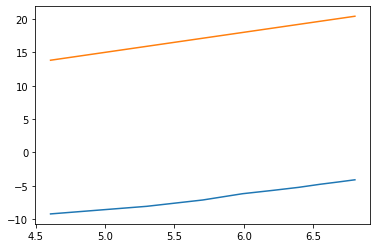

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x_data=[]
y_data=[]
for n in range(100,1000,100):
    A = np.random.randn(n, n)
    b= np.random.randn(n)
    compute_time = %timeit -o np.linalg.solve(A, b)
    best_time = compute_time.best
    x_data.append(n)
    y_data.append(best_time)
    
x=np.array(x_data)
y=np.array(y_data)
plt.plot(np.log(x),np.log(y))

y2 = x**3
plt.plot(np.log(x),np.log(y2))
plt.show

In [4]:
%%latex
\begin{equation}
\begin{aligned}
\text{It looks like a straight line because the relationship between computation time y and dimension x is } y = ax^k, log(y)=klogx+loga \\
\text{The gradient of the two lines are approximately the same, which means they have the same rate of increasing.}\\
\text{They have different constants as there is a distance between them.}
\end{aligned}
\end{equation}

<IPython.core.display.Latex object>